In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline  

In [6]:
# Read the CSV file containing crime data from 2020 to the present into a pandas DataFrame
df = pd.read_csv("../data/Crime_Data_from_2020_to_Present.csv")

# Set the pandas display option to show all columns in the DataFrame when printing it
pd.set_option("display.max_columns", None)

In [7]:
# Display the first five rows of the DataFrame to get an overview of the data
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,NaN,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [8]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(1005050, 28)

In [5]:
# Display a summary of the DataFrame, including the number of non-null entries, column data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1005050 non-null  int64  
 1   DR_No           1005050 non-null  int64  
 2   Date_Rptd       1005050 non-null  object 
 3   DateTime_OCC    1005050 non-null  object 
 4   Area            1005050 non-null  int64  
 5   Area_Name       1005050 non-null  object 
 6   Rpt_Dist_No     1005050 non-null  int64  
 7   Part 1-2        1005050 non-null  int64  
 8   Crm_Cd          1005050 non-null  int64  
 9   Crm_Cd_Desc     1005050 non-null  object 
 10  Mocodes         853358 non-null   object 
 11  Vict_Age        735628 non-null   float64
 12  Vict_Sex        860329 non-null   object 
 13  Vict_Descent    860316 non-null   object 
 14  Premis_Cd       1005034 non-null  float64
 15  Premis_Desc     1004462 non-null  object 
 16  Weapon_Used_Cd  327234 non-null   fl

In [6]:
# Display the column names of the DataFrame
df.columns

Index(['Unnamed: 0', 'DR_No', 'Date_Rptd', 'DateTime_OCC', 'Area', 'Area_Name',
       'Rpt_Dist_No', 'Part 1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'Location', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
# Rename the columns of the DataFrame for easier access and readability
df.rename(columns={
    "DR_NO": "DR_No",  # Rename 'DR_NO' to 'DR_No'
    "Date Rptd": "Date_Rptd",  # Rename 'Date Rptd' to 'Date_Rptd'
    "DATE OCC": "Date_OCC",  # Rename 'DATE OCC' to 'Date_OCC'
    "TIME OCC": "Time_OCC",  # Rename 'TIME OCC' to 'Time_OCC'
    "AREA": "Area",  # Rename 'AREA' to 'Area'
    "AREA NAME": "Area_Name",  # Rename 'AREA NAME' to 'Area_Name'
    "Rpt Dist No": "Rpt_Dist_No",  # Rename 'Rpt Dist No' to 'Rpt_Dist_No'
    "Crm Cd": "Crm_Cd",  # Rename 'Crm Cd' to 'Crm_Cd'
    "Crm Cd Desc": "Crm_Cd_Desc",  # Rename 'Crm Cd Desc' to 'Crm_Cd_Desc'
    "Vict Age": "Vict_Age",  # Rename 'Vict Age' to 'Vict_Age'
    "Vict Sex": "Vict_Sex",  # Rename 'Vict Sex' to 'Vict_Sex'
    "Vict Descent": "Vict_Descent",  # Rename 'Vict Descent' to 'Vict_Descent'
    "Premis Cd": "Premis_Cd",  # Rename 'Premis Cd' to 'Premis_Cd'
    "Premis Desc": "Premis_Desc",  # Rename 'Premis Desc' to 'Premis_Desc'
    "Weapon Used Cd": "Weapon_Used_Cd",  # Rename 'Weapon Used Cd' to 'Weapon_Used_Cd'
    "Status Desc": "Status_Desc",  # Rename 'Status Desc' to 'Status_Desc'
    "Crm Cd 1": "Crm_Cd_1",  # Rename 'Crm Cd 1' to 'Crm_Cd_1'
    "Crm Cd 2": "Crm_Cd_2",  # Rename 'Crm Cd 2' to 'Crm_Cd_2'
    "Crm Cd 3": "Crm_Cd_3",  # Rename 'Crm Cd 3' to 'Crm_Cd_3'
    "Crm Cd 4": "Crm_Cd_4",  # Rename 'Crm Cd 4' to 'Crm_Cd_4'
    "LOCATION": "Location",  # Rename 'LOCATION' to 'Location'
    "Cross Street": "Cross_Street"  # Rename 'Cross Street' to 'Cross_Street'
}, inplace=True)  # Apply the changes directly to the DataFrame

In [8]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,NaN,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1005050 non-null  int64  
 1   DR_No           1005050 non-null  int64  
 2   Date_Rptd       1005050 non-null  object 
 3   DateTime_OCC    1005050 non-null  object 
 4   Area            1005050 non-null  int64  
 5   Area_Name       1005050 non-null  object 
 6   Rpt_Dist_No     1005050 non-null  int64  
 7   Part 1-2        1005050 non-null  int64  
 8   Crm_Cd          1005050 non-null  int64  
 9   Crm_Cd_Desc     1005050 non-null  object 
 10  Mocodes         853358 non-null   object 
 11  Vict_Age        735628 non-null   float64
 12  Vict_Sex        860329 non-null   object 
 13  Vict_Descent    860316 non-null   object 
 14  Premis_Cd       1005034 non-null  float64
 15  Premis_Desc     1004462 non-null  object 
 16  Weapon_Used_Cd  327234 non-null   fl

In [10]:
# Convert the 'DateTime_OCC' column to datetime format
# This ensures that any date-related operations (e.g., filtering, sorting, or extracting time-based insights) work properly.
df['DateTime_OCC'] = pd.to_datetime(df['DateTime_OCC'])

# Convert the 'Date_Rptd' column to datetime format
# This helps in comparing the reported date with the actual occurrence date and analyzing reporting delays.
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'])

In [11]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,NaN,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Unnamed: 0      1005050 non-null  int64         
 1   DR_No           1005050 non-null  int64         
 2   Date_Rptd       1005050 non-null  datetime64[ns]
 3   DateTime_OCC    1005050 non-null  datetime64[ns]
 4   Area            1005050 non-null  int64         
 5   Area_Name       1005050 non-null  object        
 6   Rpt_Dist_No     1005050 non-null  int64         
 7   Part 1-2        1005050 non-null  int64         
 8   Crm_Cd          1005050 non-null  int64         
 9   Crm_Cd_Desc     1005050 non-null  object        
 10  Mocodes         853358 non-null   object        
 11  Vict_Age        735628 non-null   float64       
 12  Vict_Sex        860329 non-null   object        
 13  Vict_Descent    860316 non-null   object        
 14  Premis_Cd       10

In [13]:
df.describe()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Rpt_Dist_No,Part 1-2,Crm_Cd,Vict_Age,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LAT,LON
count,1.005050e+06,1.005050e+06,1005050,1005050,1.005050e+06,1.005050e+06,1.005050e+06,1.005050e+06,735628.000000,1.005034e+06,327234.000000,1.005039e+06,69142.000000,2315.000000,64.00000,1.005050e+06,1.005050e+06
mean,5.025245e+05,2.202235e+08,2022-05-25 23:16:03.340729344,2022-05-14 08:54:34.143495936,1.069114e+01,1.115573e+03,1.400292e+00,5.001400e+02,39.505873,3.056111e+02,363.947839,4.999006e+02,958.112594,984.022030,991.21875,3.399820e+01,-1.180909e+02
min,0.000000e+00,8.170000e+02,2020-01-01 00:00:00,2020-01-01 00:01:00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,2.000000,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.512622e+05,2.106169e+08,2021-04-21 00:00:00,2021-04-06 10:21:15,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,28.000000,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,5.025245e+05,2.209160e+08,2022-06-08 00:00:00,2022-05-26 12:00:00,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,37.000000,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,7.537868e+05,2.311104e+08,2023-07-04 00:00:00,2023-06-22 11:30:00,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,50.000000,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,1.005049e+06,2.521041e+08,2025-02-15 00:00:00,2025-02-14 17:00:00,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,99.000000,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00
std,2.901331e+05,1.319471e+07,NaN,NaN,6.110284e+00,6.111631e+02,4.899576e-01,2.052610e+02,15.571106,2.193040e+02,123.739813,2.050615e+02,110.355658,52.340476,27.06985,1.610666e+00,5.582222e+00


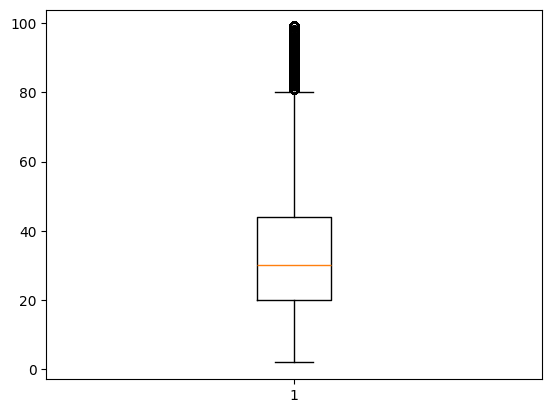

In [71]:
# Create a boxplot to visualize the distribution of the 'Vict_Age' column
# A boxplot helps to identify the spread of data, median, and potential outliers in the 'Vict_Age' values.
plt.boxplot(df["Vict_Age"])

# Display the plot to the user
# This step renders the boxplot on the screen for better data visualization and understanding.
plt.show()
# The boxplot may reveal potential overlap in age groups, helping us identify if certain age ranges have a high frequency of occurrences.

In [15]:
# Filter the DataFrame to find rows where 'Vict_Age' is greater than 100
# This helps identify any records where the victim's age may have been incorrectly entered or outliers exist.
df[df["Vict_Age"] > 100]

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON


In [16]:
# Clean the 'Vict_Age' column by replacing any age values greater than 100 with NaN (Not a Number)
# This ensures that unrealistic or erroneous age values, likely due to data entry mistakes, are excluded from further analysis.
df["Vict_Age"] = df["Vict_Age"].apply(lambda x: np.nan if x > 100 else x)

In [17]:
# Fill any NaN values in the 'Vict_Age' column with a default age value of 20
# This ensures that missing data does not interfere with analysis or model training by substituting it with a reasonable placeholder.
df["Vict_Age"].fillna(20, inplace=True)

C:\Users\dlami\AppData\Local\Temp\ipykernel_8216\3665694180.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Vict_Age"].fillna(20, inplace=True)


In [18]:
# Check how many missing (NaN) values are present in the 'Vict_Age' column
# This helps us understand if there are still any gaps in the data after cleaning and filling missing values.
df['Vict_Age'].isna().sum()

np.int64(0)

In [19]:
# Replace any 'Vict_Age' values less than 1 with NaN (Not a Number)
# This ensures that unrealistic or erroneous age values (e.g., age being 0 or negative) are treated as missing data for cleaning.
df['Vict_Age'] = df['Vict_Age'].apply(lambda x: np.nan if x < 1 else x)

In [20]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Unnamed: 0      1005050 non-null  int64         
 1   DR_No           1005050 non-null  int64         
 2   Date_Rptd       1005050 non-null  datetime64[ns]
 3   DateTime_OCC    1005050 non-null  datetime64[ns]
 4   Area            1005050 non-null  int64         
 5   Area_Name       1005050 non-null  object        
 6   Rpt_Dist_No     1005050 non-null  int64         
 7   Part 1-2        1005050 non-null  int64         
 8   Crm_Cd          1005050 non-null  int64         
 9   Crm_Cd_Desc     1005050 non-null  object        
 10  Mocodes         853358 non-null   object        
 11  Vict_Age        1005050 non-null  float64       
 12  Vict_Sex        860329 non-null   object        
 13  Vict_Descent    860316 non-null   object        
 14  Premis_Cd       10

In [22]:
# Get the unique values in the 'Vict_Sex' column
# This helps to understand the different categories or possible values for the 'Vict_Sex' column, such as 'Male', 'Female', etc.
df['Vict_Sex'].unique()

array(['M', 'Other', nan, 'F'], dtype=object)

In [23]:
# Replace any occurrences of '-' in the 'Vict_Sex' column with NaN (Not a Number)
# This is done to treat '-' as a missing or invalid value, ensuring data quality for analysis.
df['Vict_Sex'].replace('-', np.nan, inplace=True)

C:\Users\dlami\AppData\Local\Temp\ipykernel_8216\467137651.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vict_Sex'].replace('-', np.nan, inplace=True)


In [24]:
df['Vict_Sex'].unique()

array(['M', 'Other', nan, 'F'], dtype=object)

In [25]:
# Replace any occurrences of 'X' or 'H' in the 'Vict_Sex' column with 'Other'
# This standardizes the data by categorizing non-standard values as 'Other' for clarity and consistency in analysis.
df['Vict_Sex'] = df['Vict_Sex'].replace(["X", "H"], "Other")

In [26]:
df['Vict_Sex'].unique()

array(['M', 'Other', nan, 'F'], dtype=object)

In [27]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [28]:
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Unknown',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Puerto Rican'
}

In [29]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [30]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [31]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [32]:
# Convert the 'Crm_Cd' column to integer type
# This ensures that the 'Crm_Cd' values are treated as numerical data, allowing for numerical operations and analysis.
df['Crm_Cd'] = df['Crm_Cd'].astype(int)

In [33]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [34]:
df['Crm_Cd'] = df['Crm_Cd'].astype(str)

In [35]:
df.tail()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
1005045,1005045,251004092,2025-01-25,2025-01-24 12:40:00,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 0344 0385,68.0,M,Other,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837
1005046,1005046,251704066,2025-01-17,2025-01-17 16:00:00,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,0400 1259 1822 0356,17.0,M,Hispanic,721.0,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233
1005047,1005047,251104089,2025-02-02,2025-01-30 17:30:00,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,0344 1302 1307,32.0,F,Hispanic,109.0,PARK/PLAYGROUND,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004
1005048,1005048,252104053,2025-01-19,2025-01-17 15:30:00,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,20.0,M,White,720.0,JUNIOR HIGH SCHOOL,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103
1005049,1005049,250504051,2025-01-14,2025-01-14 12:50:00,5,Harbor,509,1,210,ROBBERY,1822 0344 1259,15.0,F,Hispanic,721.0,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,NaN,NaN,NaN,24300 WESTERN AV,NaN,33.8046,-118.3074


In [36]:
year = df.DateTime_OCC.dt.year.value_counts()
year

DateTime_OCC
2022    235255
2023    232346
2021    209871
2020    199847
2024    127565
2025       166
Name: count, dtype: int64

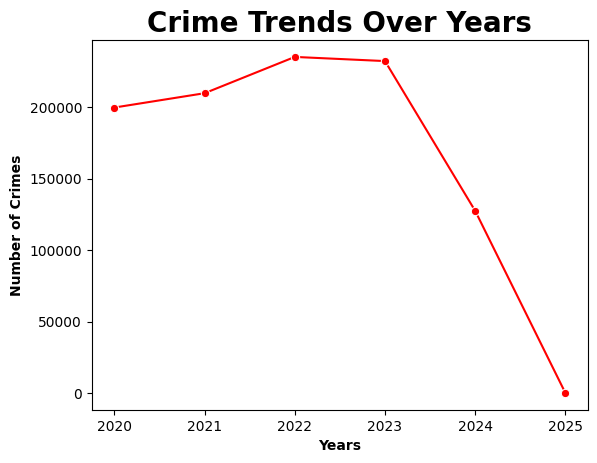

In [37]:
# Create a line plot to visualize crime trends over the years
# The 'x' axis represents the years, and the 'y' axis represents the number of crimes.
sns.lineplot(x=year.index, y=year, color='red', marker='o')

# Set the title of the plot to describe the data being visualized
plt.title('Crime Trends Over Years', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Years)
plt.xlabel('Years', fontweight='bold')

# Set the label for the y-axis (Number of Crimes)
plt.ylabel('Number of Crimes', fontweight='bold')

# Display the plot on the screen
plt.show()

In [38]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [39]:
# Filter the dataset to select rows where the year in 'DateTime_OCC' is 2022
# This helps isolate the data for the year with the highest number of crimes.
year_of_high_crime = df[df['DateTime_OCC'].apply(lambda x: True if x.year == 2022 else False)]

# Display the first few rows of the filtered data for inspection
year_of_high_crime.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
339818,339818,220715891,2022-10-29,2022-10-29 13:00:00,7,Wilshire,702,1,352,PICKPOCKET,1202 0344,62.0,M,Black,101.0,STREET,NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,MELROSE,MARTEL,34.0836,-118.3511
340069,340069,220712568,2022-08-06,2022-08-05 18:30:00,7,Wilshire,723,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,103.0,ALLEY,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,7900 W 3RD ST,NaN,34.0717,-118.3623
340876,340876,221915070,2022-09-29,2022-09-21 14:00:00,19,Mission,1961,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,9300 N SEPULVEDA BL,NaN,34.2446,-118.4676
341068,341068,220510220,2022-06-15,2022-06-13 14:00:00,5,Harbor,504,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1600 W 204TH ST,NaN,33.8457,-118.3066
341205,341205,221304343,2022-01-09,2022-01-09 00:01:00,13,Newton,1333,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,600 E 28TH ST,NaN,34.0208,-118.2643


In [40]:
# Count the number of crimes for each month in 2022
# 'dt.month' extracts the month from the 'DateTime_OCC' column, and 'value_counts()' counts occurrences per month
# 'sort_index(ascending=True)' sorts the months in chronological order (from January to December)
month_count = year_of_high_crime.DateTime_OCC.dt.month.value_counts().sort_index(ascending=True)

# This gives the number of crimes for each month in 2022, which can be used for month-to-month visualization.

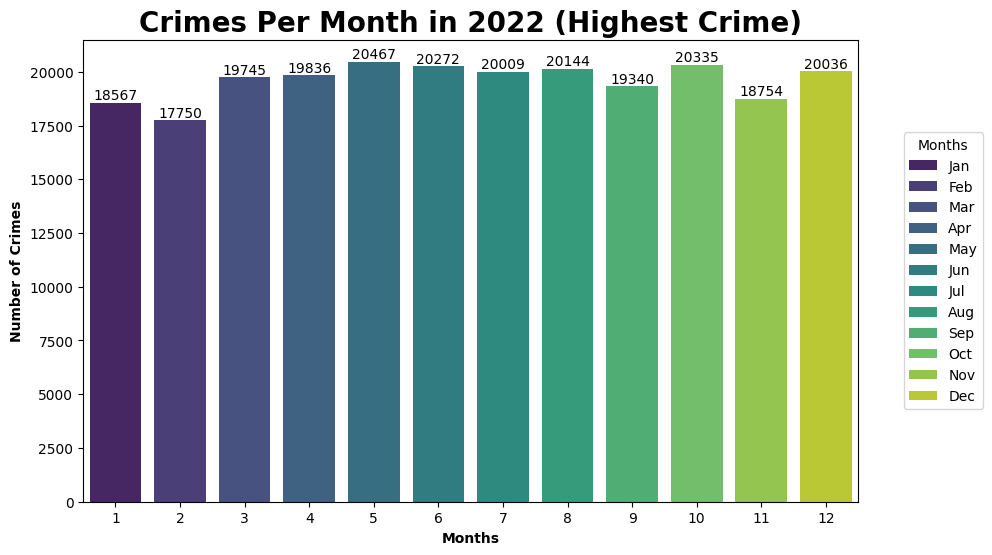

In [41]:
# List of month names to use for x-axis labels
months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a figure with custom size for better visualization
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the number of crimes per month
# 'month_count.index' represents the months, 'month_count' represents the number of crimes in each month
ax = sns.barplot(x=month_count.index, y=month_count, hue=months, palette='viridis')

# Add labels on top of each bar to display the exact number of crimes
for index in range(len(months)):
    ax.bar_label(ax.containers[index])

# Customize the legend to display 'Months' and place it outside the plot for better clarity
plt.legend(title='Months', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set the title of the plot with bold font and large size
plt.title('Crimes Per Month in 2022 (Highest Crime)', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Months) with bold font
plt.xlabel('Months', fontweight='bold')

# Set the label for the y-axis (Number of Crimes) with bold font
plt.ylabel('Number of Crimes', fontweight='bold')

# Display the plot
plt.show()

In [42]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


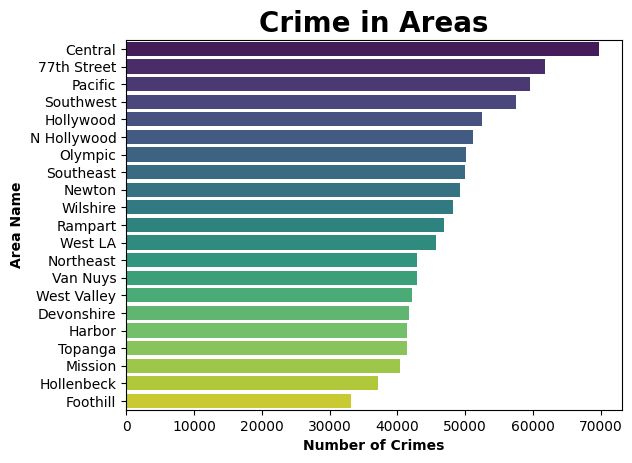

In [43]:
# Count the number of crimes in each area by using the 'Area_Name' column
# 'value_counts()' counts the occurrences of each unique area in the dataset
area_count = df['Area_Name'].value_counts()

# Create a barplot to visualize crime distribution across different areas
# 'area_count.index' represents the area names, and 'area_count' represents the number of crimes in each area
ax = sns.barplot(y=area_count.index, x=area_count, hue=area_count.index, palette='viridis')

# Set the title of the plot with bold and large font size
plt.title('Crime in Areas', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Area Name) with bold font
plt.ylabel('Area Name', fontweight='bold')

# Display the plot
plt.show()

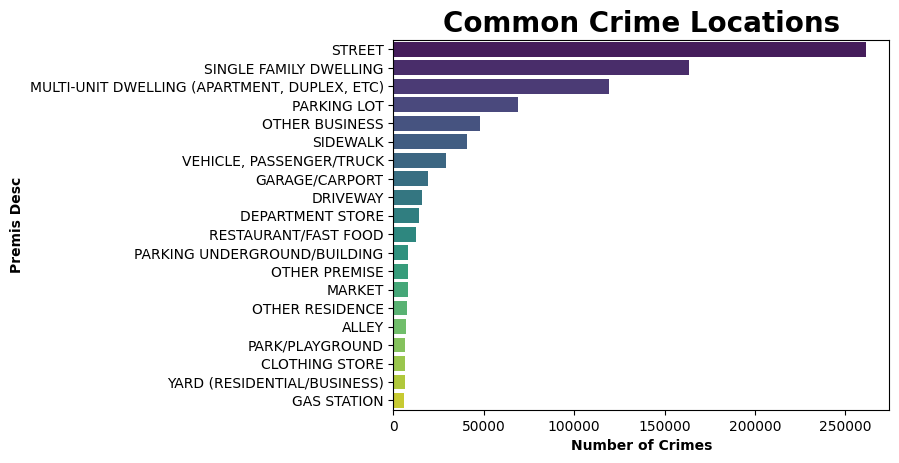

In [44]:
# Count the occurrences of each crime location in the 'Premis_Desc' column and select the top 20
# 'value_counts()' counts the unique locations, and 'head(20)' limits the result to the top 20 most frequent locations
premis_dc_count = df['Premis_Desc'].value_counts().head(20)

# Create a barplot to visualize the most common crime locations
# 'premis_dc_count.index' represents the crime location descriptions, and 'premis_dc_count' represents the number of crimes at each location
sns.barplot(y=premis_dc_count.index, x=premis_dc_count, hue=premis_dc_count.index, palette='viridis')

# Set the title of the plot with bold font and large size
plt.title('Common Crime Locations', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Premis Description) with bold font
plt.ylabel('Premis Desc', fontweight='bold')

# Display the plot
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Unnamed: 0      1005050 non-null  int64         
 1   DR_No           1005050 non-null  int64         
 2   Date_Rptd       1005050 non-null  datetime64[ns]
 3   DateTime_OCC    1005050 non-null  datetime64[ns]
 4   Area            1005050 non-null  int64         
 5   Area_Name       1005050 non-null  object        
 6   Rpt_Dist_No     1005050 non-null  int64         
 7   Part 1-2        1005050 non-null  int64         
 8   Crm_Cd          1005050 non-null  object        
 9   Crm_Cd_Desc     1005050 non-null  object        
 10  Mocodes         853358 non-null   object        
 11  Vict_Age        1005050 non-null  float64       
 12  Vict_Sex        860329 non-null   object        
 13  Vict_Descent    860316 non-null   object        
 14  Premis_Cd       10

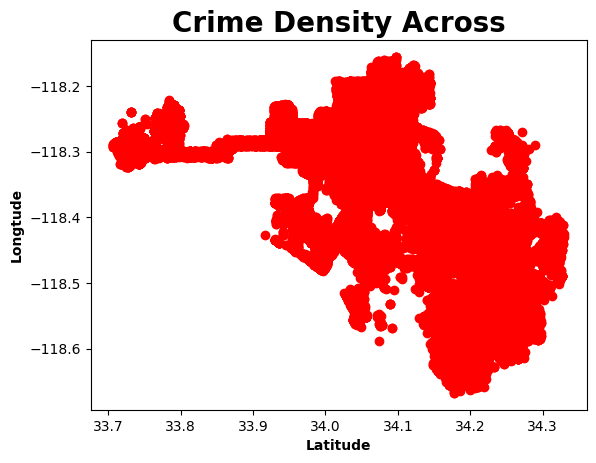

In [46]:
# Select the last 109,000 rows of latitude and longitude data for crime density visualization
# 'df[['LAT', 'LON']]' selects the latitude and longitude columns
crime_density = df[['LAT', 'LON']].tail(109000)

# Set 'LAT' as the index to make the latitude the primary axis
crime_density.set_index("LAT", inplace=True)

# Sort the data by latitude to ensure that the points are ordered correctly on the x-axis
crime_density.sort_index(inplace=True)

# Create a scatter plot to visualize crime density across different latitude and longitude points
# 'crime_density.index' represents the latitude values, and 'crime_density' represents the longitude values
plt.scatter(crime_density.index, crime_density, color='red')

# Set the title of the plot with bold and large font size
plt.title('Crime Density Across', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Latitude) with bold font
plt.xlabel('Latitude', fontweight='bold')

# Set the label for the y-axis (Longitude) with bold font
plt.ylabel('Longtude', fontweight='bold')

# Display the scatter plot to visualize crime density based on geographic coordinates
plt.show()

In [47]:
df.head()

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,Other,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,4,200412582,2020-09-09,2020-09-09 06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,20.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [48]:
crm_cd_desc= df['Crm_Cd_Desc'].value_counts().head(25)

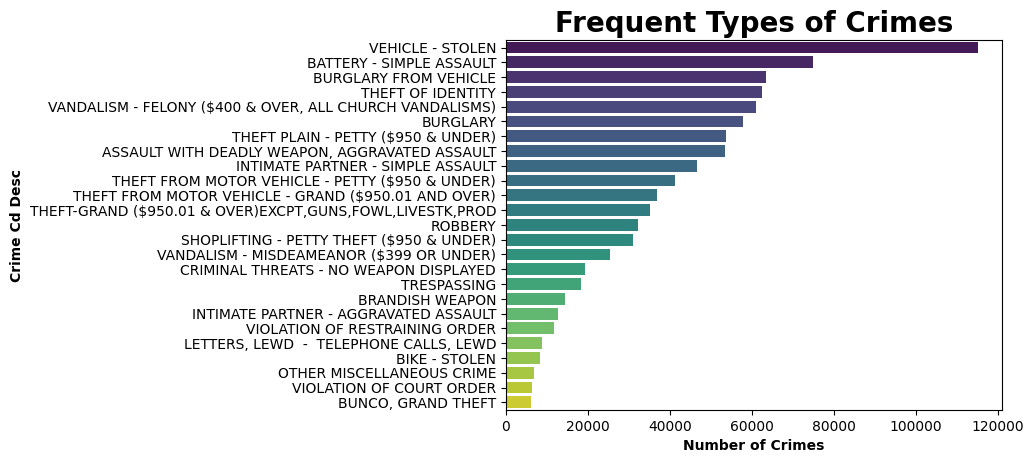

In [49]:
# Create a barplot to visualize the most frequent types of crimes
# 'crm_cd_desc' contains crime type descriptions, and we want to count how often each type occurs
sns.barplot(x=crm_cd_desc, y=crm_cd_desc.index, hue=crm_cd_desc.index, palette='viridis')

# Set the title of the plot with bold and large font size
plt.title('Frequent Types of Crimes', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Crime Description) with bold font
plt.ylabel('Crime Cd Desc', fontweight='bold')

# Display the plot to visualize the frequency of crime types
plt.show()

In [50]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [51]:
weapons_crime_count = df['Weapon Desc'].value_counts().head(20)
weapons_crime_count

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174746
UNKNOWN WEAPON/OTHER WEAPON                        36386
VERBAL THREAT                                      23846
HAND GUN                                           20185
SEMI-AUTOMATIC PISTOL                               7267
KNIFE WITH BLADE 6INCHES OR LESS                    6838
UNKNOWN FIREARM                                     6581
OTHER KNIFE                                         5881
MACE/PEPPER SPRAY                                   3730
VEHICLE                                             3260
ROCK/THROWN OBJECT                                  2739
PIPE/METAL PIPE                                     2469
BOTTLE                                              2414
FOLDING KNIFE                                       2266
STICK                                               2249
CLUB/BAT                                            2088
KITCHEN KNIFE                                       1921
AIR PISTOL/REVOLVER

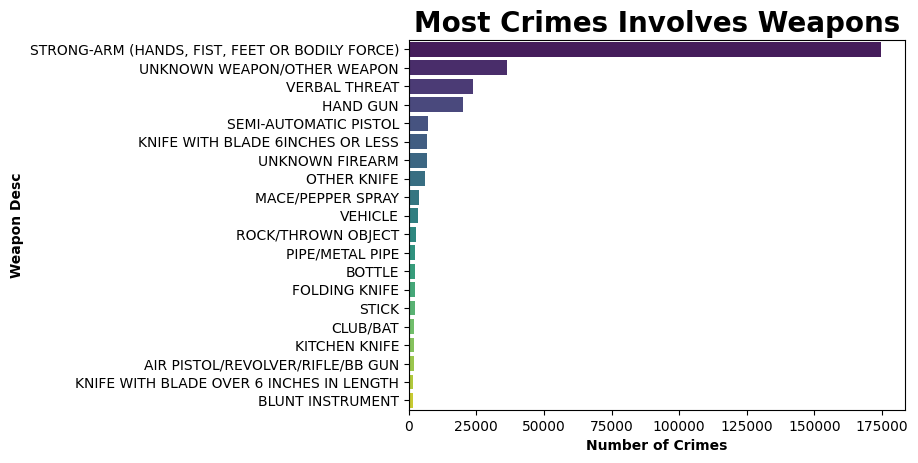

In [52]:
# Create a barplot to visualize the frequency of crimes involving different weapons
# 'weapons_crime_count' contains weapon descriptions, and we want to count how often each weapon type occurs in crimes
sns.barplot(x=weapons_crime_count, y=weapons_crime_count.index, hue=weapons_crime_count.index, palette='viridis')

# Set the title of the plot with bold and large font size
plt.title('Most Crimes Involves Weapons', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Weapon Description) with bold font
plt.ylabel('Weapon Desc', fontweight='bold')

# Display the plot to visualize the frequency of crimes involving weapons
plt.show()

In [53]:
df.head(3)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,Other,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


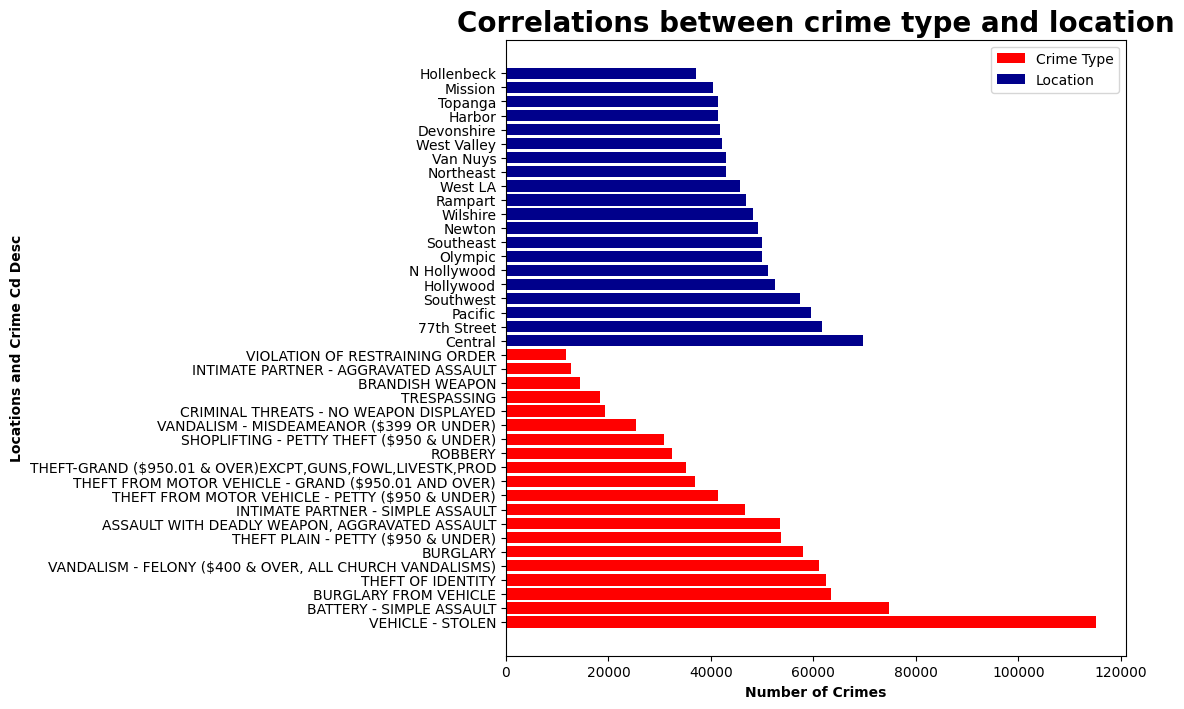

In [54]:
# Count the occurrences of different crime types and locations (top 20)
crime_type_count = df['Crm_Cd_Desc'].value_counts().head(20)
location_count = df['Area_Name'].value_counts().head(20)

# Set up the figure size for the plot to ensure clarity
plt.figure(figsize=(8, 8))

# Create horizontal bars for crime type counts, in red color
plt.barh(crime_type_count.index, crime_type_count, color='red')

# Create horizontal bars for location counts, in dark blue color
plt.barh(location_count.index, location_count, color='darkblue')

# Add a legend to differentiate between crime types and locations
plt.legend(['Crime Type', 'Location'])

# Set the title of the plot with bold and large font size
plt.title('Correlations between crime type and location', fontsize=20, fontweight='bold')

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Locations and Crime Types) with bold font
plt.ylabel('Locations and Crime Cd Desc', fontweight='bold')

# Display the plot to visualize the correlation between crime types and locations
plt.show()

In [55]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


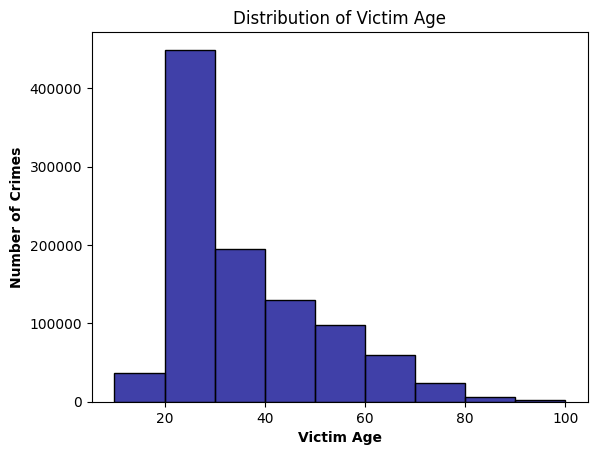

In [56]:
# Create a histogram to visualize the distribution of victim ages
# Use bins in intervals of 10 from 10 to 110, and color the bars in dark blue
ax = sns.histplot(df['Vict_Age'], bins=np.arange(10, 110, 10), color='darkblue')

# Set the title of the plot with bold and large font size
plt.title('Distribution of Victim Age')

# Set the label for the x-axis (Victim Age) with bold font
plt.xlabel('Victim Age', fontweight='bold')

# Set the label for the y-axis (Number of Crimes) with bold font
plt.ylabel('Number of Crimes', fontweight='bold')

# Display the plot to show the age distribution of victims
plt.show()

In [57]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


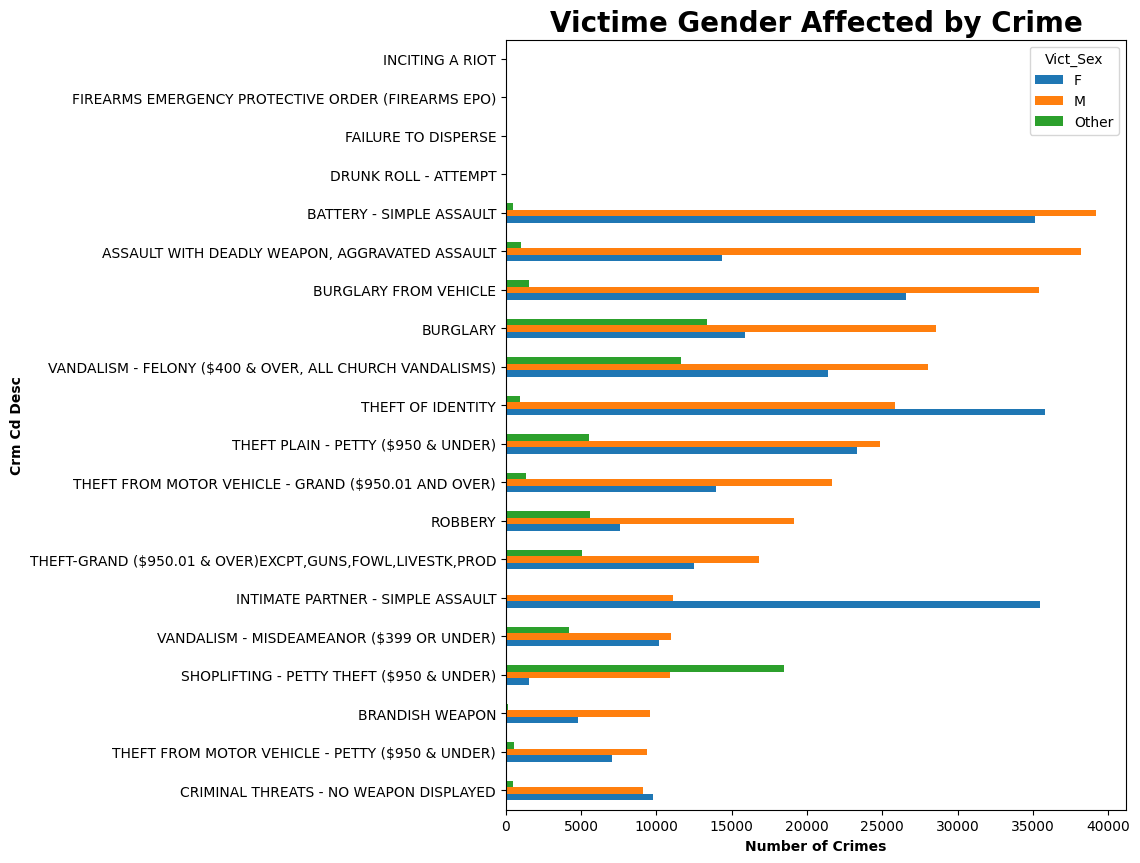

In [58]:
# Group the dataset by crime description (Crm_Cd_Desc) and victim gender (Vict_Sex), then count occurrences
crime_counts = df.groupby(["Crm_Cd_Desc", "Vict_Sex"]).size().unstack()

# Sort the values based on the number of male victims ('M') in ascending order
crime_counts.sort_values('M', inplace=True)

# Select the top 20 crimes with the highest number of male victims
crime_counts = crime_counts.tail(20)

# Plot the data as a horizontal bar chart
crime_counts.plot(kind='barh', figsize=(8, 10))

# Set the title of the plot with bold and large font size
plt.title('Victime Gender Affected by Crime', fontweight='bold', fontsize=20)

# Set the label for the x-axis (Number of Crimes) with bold font
plt.xlabel('Number of Crimes', fontweight='bold')

# Set the label for the y-axis (Crime Code Description) with bold font
plt.ylabel('Crm Cd Desc', fontweight='bold')

# Display the plot to show gender-based crime distribution
plt.show()

In [59]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [60]:
df.Vict_Descent.value_counts().iloc[4:].index

Index(['Other', 'Asian', 'Korean', 'Filipino', 'Chinese', 'Japanese',
       'Vietnamese', 'American Indian/Alaskan Native', 'Puerto Rican',
       'Pacific Islander', 'Cambodian', 'Laotian', 'Guamanian', 'Samoan'],
      dtype='object', name='Vict_Descent')

In [61]:
df['Vict_Descent'].unique()

array(['Other', 'Unknown', nan, 'White', 'Hispanic', 'Black', 'Asian',
       'Korean', 'Chinese', 'Filipino', 'Puerto Rican', 'Vietnamese',
       'American Indian/Alaskan Native', 'Pacific Islander', 'Japanese',
       'Guamanian', 'Cambodian', 'Samoan', 'Laotian'], dtype=object)

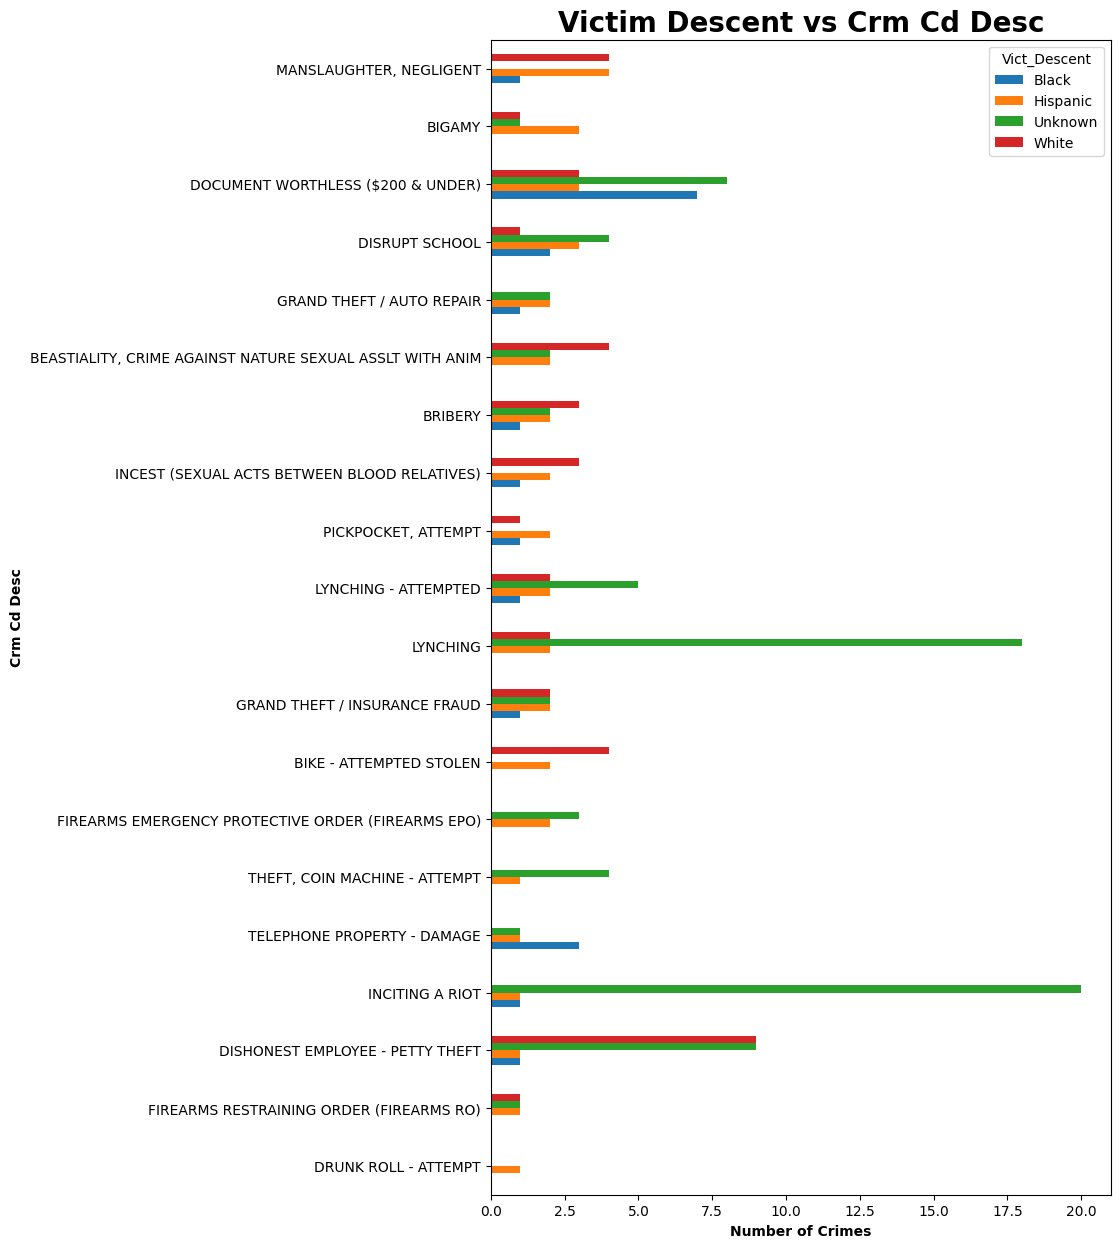

In [62]:
# Group dataset by Crime Description and Victim Descent, then count occurrences
ethinicity = df.groupby(['Crm_Cd_Desc', 'Vict_Descent']).size().unstack().sort_values('Hispanic').head(20)

# Define a list of races to drop from the analysis
race_drop = ['Other', 'Asian', 'Korean', 'Filipino', 'Chinese', 'Japanese',
       'Vietnamese', 'American Indian/Alaskan Native', 'Puerto Rican',
       'Pacific Islander', 'Cambodian', 'Laotian', 'Guamanian', 'Samoan']

ethinicity.drop(columns=race_drop, inplace=True)

# Plot the data as a horizontal bar chart
ethinicity.plot(kind='barh', figsize=(8, 15))

# Add title and labels with bold font
plt.title('Victim Descent vs Crm Cd Desc', fontsize=20, fontweight='bold')
plt.xlabel('Number of Crimes', fontweight='bold')
plt.ylabel('Crm Cd Desc', fontweight='bold')

# Display the plot
plt.show()

In [63]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


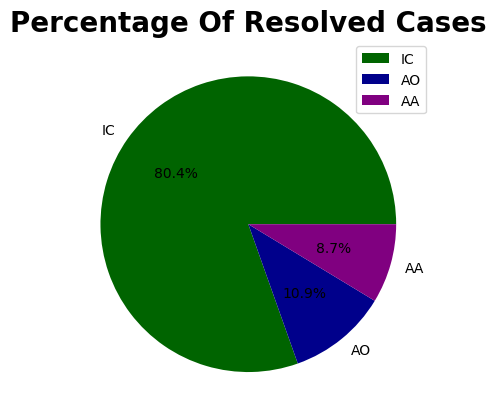

In [64]:
# Calculate percentage distribution of 'Status' column
status_percentage = df['Status'].value_counts()*100 / df['Status'].__len__()

# Select only the top 3 most common statuses
status_percentage = status_percentage.head(3)

# Plot the pie chart
status_percentage.plot(kind='pie', autopct="%1.1f%%", colors=['darkgreen', 'darkblue', 'purple'])

# Add title and legend
plt.legend()
plt.title('Percentage Of Resolved Cases', fontsize=20, fontweight='bold')

# Remove default y-label
plt.ylabel('')

# Display the chart
plt.show()

In [65]:
df.head(2)

,Unnamed: 0,DR_No,Date_Rptd,DateTime_OCC,Area,Area_Name,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon Desc,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,Location,Cross_Street,LAT,LON
0,0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,20.0,M,Other,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [66]:
# Split into two dataframes: first 35 and last 35 rows
unresolved1= df.groupby(['Crm_Cd_Desc', 'Status']).size().unstack().head(35)
unresolved2= df.groupby(['Crm_Cd_Desc', 'Status']).size().unstack().tail(35)

# Drop columns safely (only if they exist)
unresolved1.drop(columns=['CC', 'JA', 'JO'], inplace=True)
unresolved2.drop(columns=['CC', 'JA', 'JO'], inplace=True)

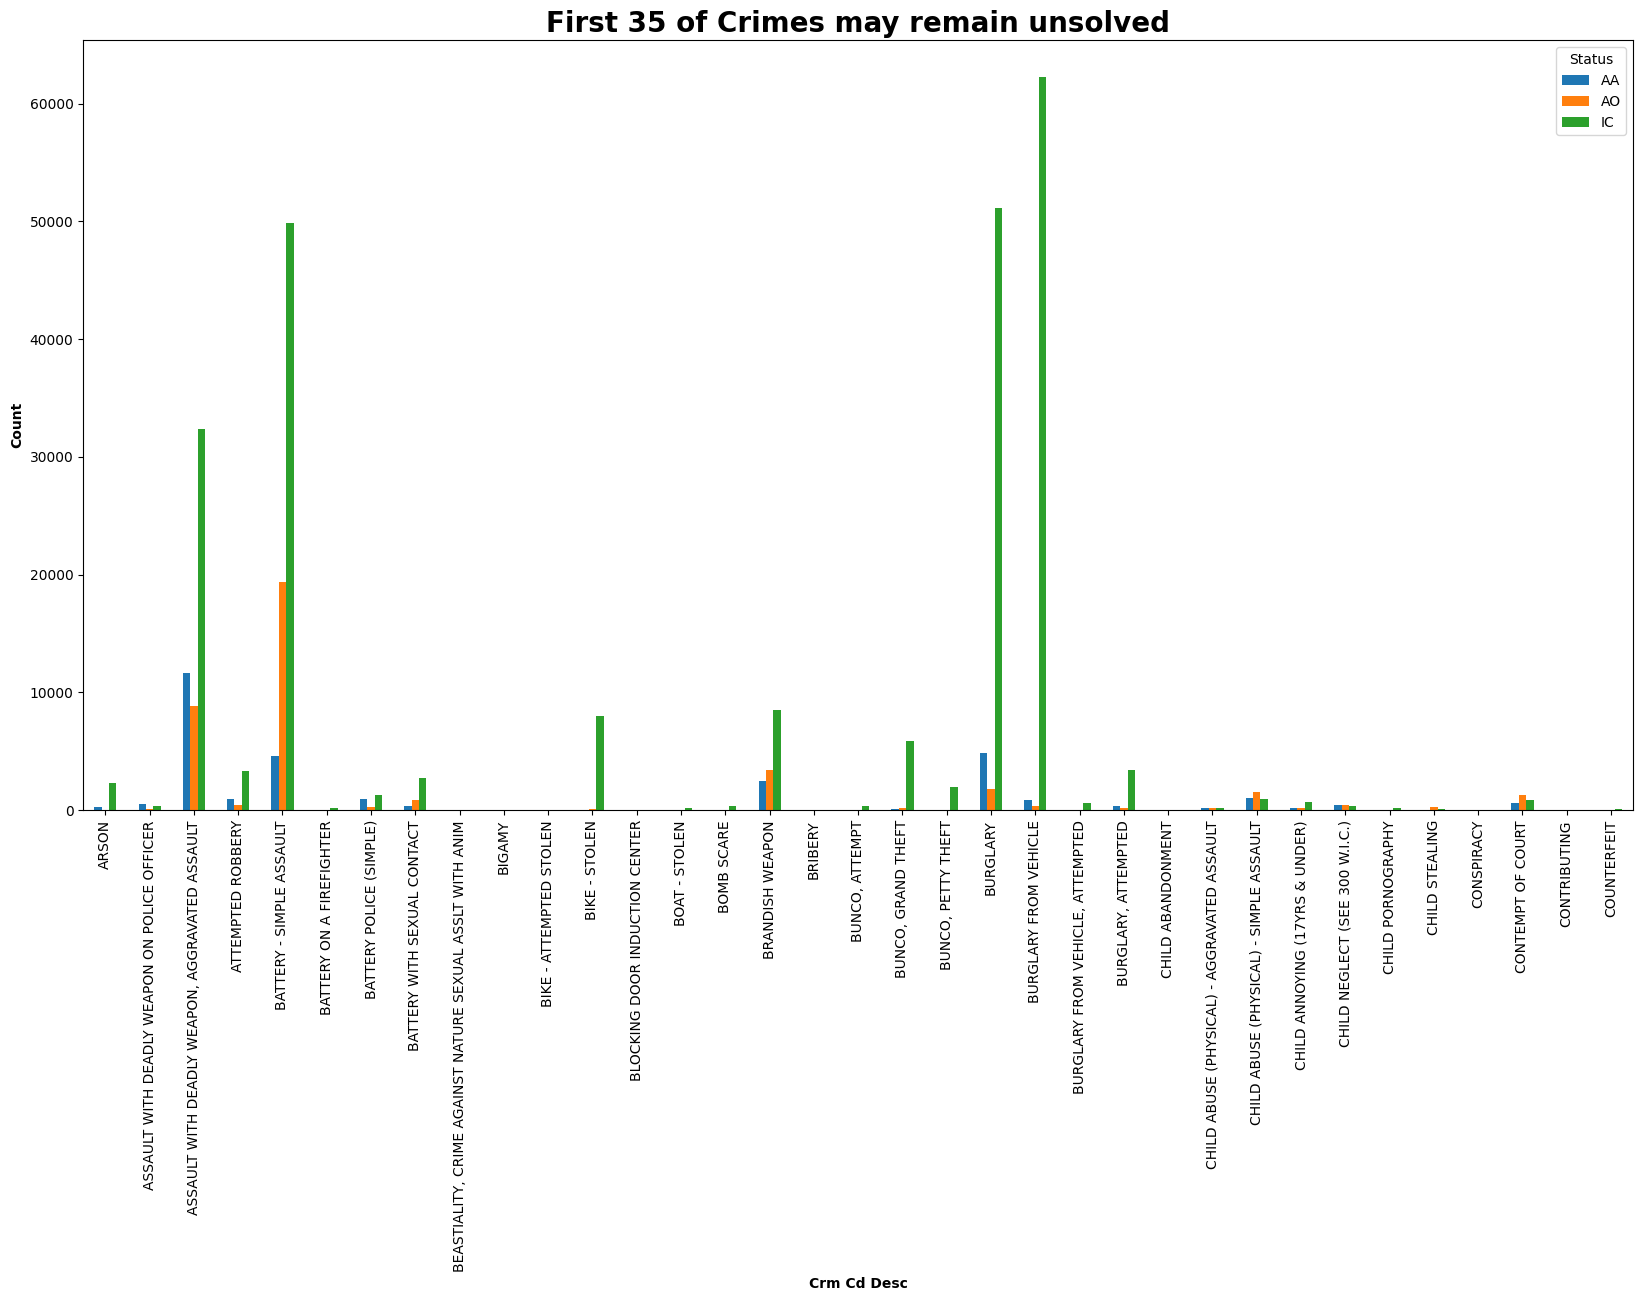

In [67]:
# Plot a bar chart for the first 35 crime categories that may remain unsolved
unresolved1.plot(kind='bar', figsize=(20, 10))

# Set the title of the plot with bold font and larger size
plt.title('First 35 of Crimes may remain unsolved', fontweight='bold', fontsize=20)

# Label the x-axis to indicate crime descriptions
plt.xlabel('Crm Cd Desc', fontweight='bold')

# Label the y-axis to represent the count of cases
plt.ylabel('Count', fontweight='bold')

# Display the plot
plt.show()

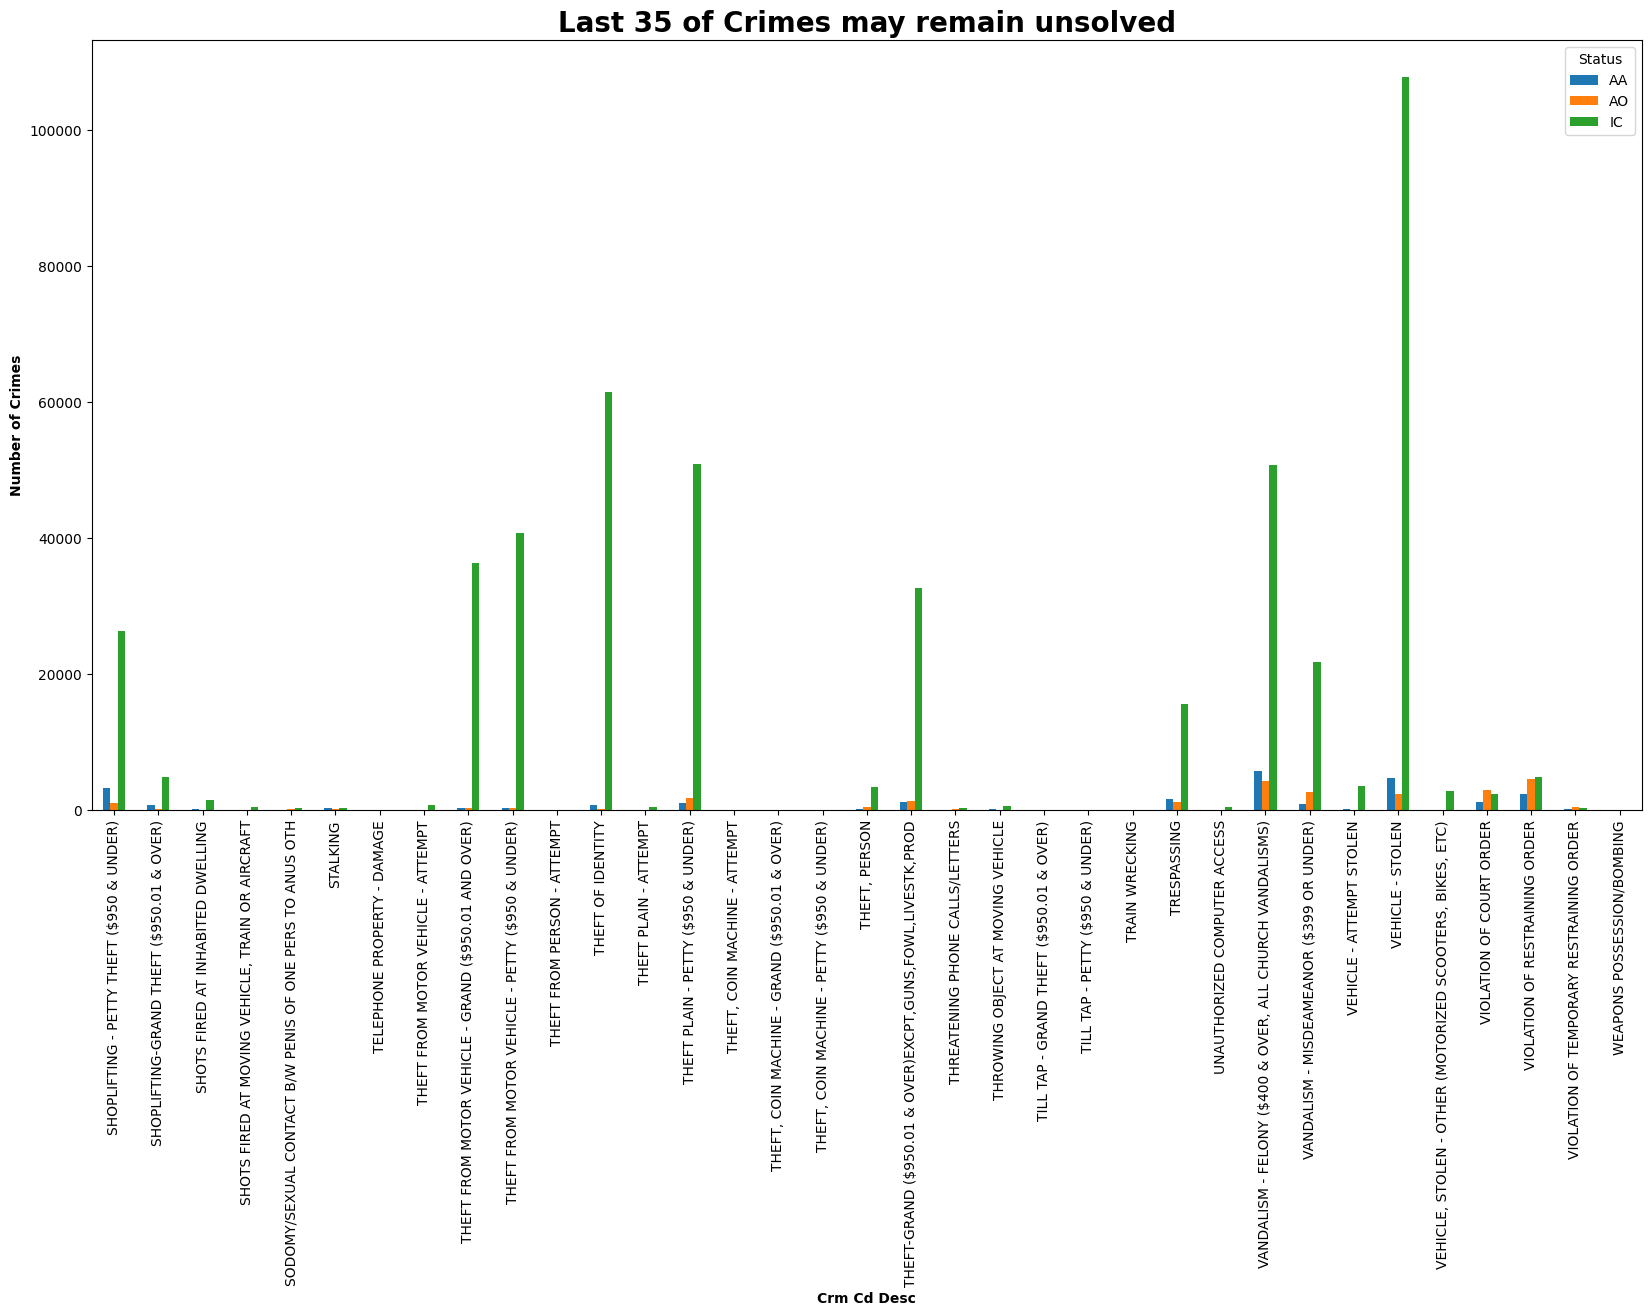

In [68]:
# Plot a bar chart for the last 35 crime categories that may remain unsolved
unresolved2.plot(kind='bar', figsize=(20, 10))

# Set the title of the plot with bold font and larger size
plt.title('Last 35 of Crimes may remain unsolved', fontweight='bold', fontsize=20)

# Label the x-axis to indicate crime descriptions
plt.xlabel('Crm Cd Desc', fontweight='bold')

# Label the y-axis to represent the number of crimes
plt.ylabel('Number of Crimes', fontweight='bold')

# Display the plot
plt.show()